<a href="https://colab.research.google.com/github/azelia-choi/ITB2022/blob/main/%5B1914114_%EC%B5%9C%EA%B0%80%EC%9D%80%5D_%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part0. 데이터 불러오기💻

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

In [4]:
#필요한 라이브러리 import
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats

In [28]:
#맥북 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [5]:

plt.rc('font', family='NanumBarunGothic') 

# Part1. 전처리👀

In [6]:
#원본데이터 df로 복제
df = data.copy()
print(df.shape)

(10000, 31)


In [7]:
display(df.head()) 
print(df.info()) 
print(df.describe()) 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [8]:
#describe 함수로 살펴보기
df.describe().style.background_gradient(cmap = "summer")

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9912.000000,9912.000000,9912.000000,4044.000000,4044.000000,4044.000000,3977.000000,9912.000000,9861.000000,9912.000000,9912.000000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.000000,5000.500000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,124.669693,76.789750,103.777542,198.269041,132.801434,56.158309,116.263264,14.214255,1.119461,0.848484,27.589790,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.000000,2886.895680,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,14.629865,9.931527,24.649816,41.945872,92.919969,14.484780,37.829955,1.555386,0.489782,0.301012,17.884420,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.000000,1.000000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,77.000000,40.000000,55.000000,70.000000,14.000000,19.000000,13.000000,5.100000,1.000000,0.050000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.000000,2500.750000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,70.000000,91.000000,169.000000,77.000000,46.000000,89.000000,13.200000,1.000000,0.700000,20.000000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.000000,5000.500000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,77.000000,99.000000,197.000000,111.000000,54.000000,115.000000,14.200000,1.000000,0.800000,24.000000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.000000,7500.250000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,134.000000,83.000000,109.000000,225.000000,160.000000,65.000000,141.000000,15.300000,1.000000,1.000000,30.000000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.000000,10000.000000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,200.000000,130.000000,473.000000,387.000000,1701.000000,125.000000,297.000000,20.000000,6.000000,9.200000,692.000000,1146.000000,2322.000000,1.000000,1.000000,2.000000


In [9]:
#결측치 있는 데이터 알아보기
df.info(verbose=True, show_counts=True)

#결측치 있는 데이터
#수축기혈압, 이완기혈압, 식전혈당(공복혈당),(혈청지오티)AST ,(혈청지오티)AST,(혈청지오티)ALT, 감마지티피: 9912개
#총콜레스테롤, 트리슬리세라이드, HDLzhffptmxpfhf : 4044개 등등 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [10]:
#데이터를 다루기 용이하도록 컬럼명 변경

# 신장(5Cm단위) -> 신장
# 체중(5Kg 단위) -> 체중
#연령대코드(5세단위) -> 연령대코드

df.rename(columns={'신장(5Cm단위)': '신장', '체중(5Kg 단위)': '체중','연령대코드(5세단위)' : '연령대'}, inplace=True)

### 음주 및 흡연과 비만율(BMI)과의 상관관계 알아보기위해 데이터프레임(df_1) 만들기

In [11]:
#관심있는 Columns만 추출하여 알아보기
df_1 = df[['성별코드', '연령대','신장','체중','허리둘레','흡연상태','음주여부']]

df_1.head()

,성별코드,연령대,신장,체중,허리둘레,흡연상태,음주여부
0,M,9,165,60,72.1,No,No
1,F,13,150,65,81.0,No,No
2,F,12,155,55,70.0,No,No
3,M,13,160,70,90.8,No,No
4,F,12,155,50,75.2,No,No


![image.png](
  
)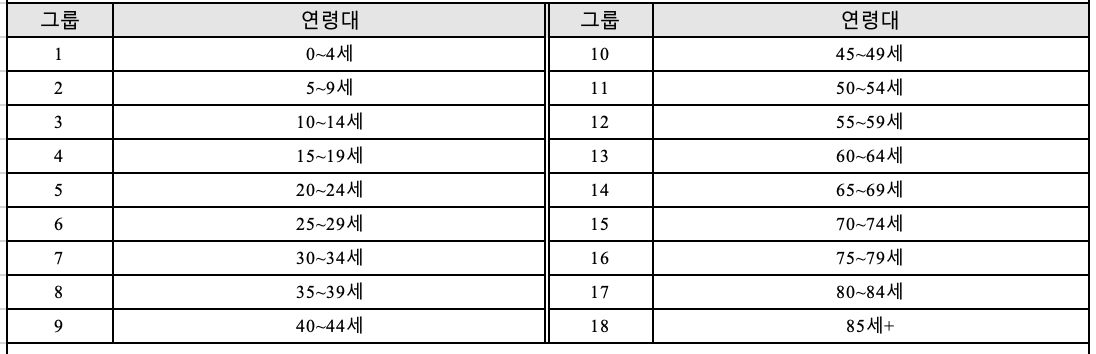

In [12]:
#알아보기 쉽게 연령대 값 변경

df_1['연령대'].replace({1: '0-4',2: '5-9',
                   3: '10-14',4: '15-19',
                   5: '20-24',6: '25-29',
                   7: '30-34',8: '35-39',
                   9: '40-44',10: '45-49',
                   11: '50-54',12: '55-59',
                   13: '60-64',14: '65-69',
                   15: '70-74',16: '75-79',
                   17: '80-84',18: '85-'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
#결측치있는 행 제거 
##흡연상태에 2개의 결측치, 음주여부에 1개의 결측치가 있음

df_1.info()
df_1 = df_1.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별코드    10000 non-null  object 
 1   연령대     10000 non-null  object 
 2   신장      10000 non-null  int64  
 3   체중      10000 non-null  int64  
 4   허리둘레    10000 non-null  float64
 5   흡연상태    9998 non-null   object 
 6   음주여부    9999 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


In [14]:
#3개의 행이 제거됨 -> 9997개의 데이터를 활용하여 분석
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별코드    9997 non-null   object 
 1   연령대     9997 non-null   object 
 2   신장      9997 non-null   int64  
 3   체중      9997 non-null   int64  
 4   허리둘레    9997 non-null   float64
 5   흡연상태    9997 non-null   object 
 6   음주여부    9997 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 624.8+ KB


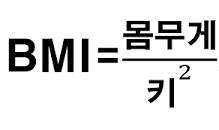

In [15]:
#음주 및 흡연과 비만율(BMI)과의 상관관계 알아보기위해 BMI 열 새로 만들기

df_1['BMI'] = df_1['체중'] /  (df_1['신장'] *  df_1['신장']) * 10000

In [16]:
#잘 생성되었는지 확인
df_1.head()

,성별코드,연령대,신장,체중,허리둘레,흡연상태,음주여부,BMI
0,M,40-44,165,60,72.1,No,No,22.038567
1,F,60-64,150,65,81.0,No,No,28.888889
2,F,55-59,155,55,70.0,No,No,22.892820
3,M,60-64,160,70,90.8,No,No,27.343750
4,F,55-59,155,50,75.2,No,No,20.811655


![image.png](
  
)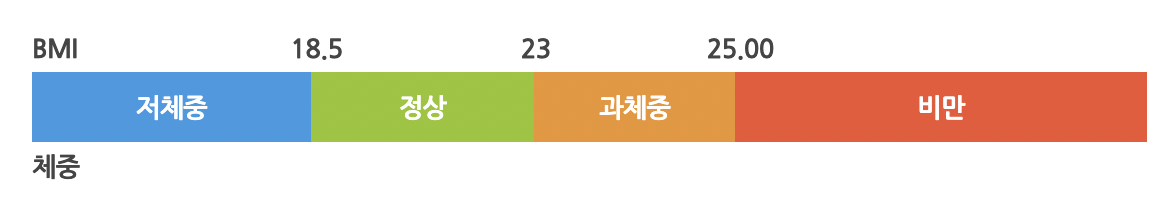

### https://health.seoulmc.or.kr/healthCareInfo/myBMIPopup.do

In [17]:
#BMI지수에 따른 비만정도 알아보기 위해 grades 열 추가

grades = []
for row in df_1['BMI'] : 
  if row <= 18.5:
    grades.append('저체중')
  elif row <= 23:
    grades.append('정상')
  elif row <= 25:
    grades.append('과체중')
  else:
    grades.append('비만')

df_1['grades'] = grades

In [18]:
#잘 생성되었는지 확인
df_1.head()

,성별코드,연령대,신장,체중,허리둘레,흡연상태,음주여부,BMI,grades
0,M,40-44,165,60,72.1,No,No,22.038567,정상
1,F,60-64,150,65,81.0,No,No,28.888889,비만
2,F,55-59,155,55,70.0,No,No,22.892820,정상
3,M,60-64,160,70,90.8,No,No,27.343750,비만
4,F,55-59,155,50,75.2,No,No,20.811655,정상


In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별코드    9997 non-null   object 
 1   연령대     9997 non-null   object 
 2   신장      9997 non-null   int64  
 3   체중      9997 non-null   int64  
 4   허리둘레    9997 non-null   float64
 5   흡연상태    9997 non-null   object 
 6   음주여부    9997 non-null   object 
 7   BMI     9997 non-null   float64
 8   grades  9997 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 781.0+ KB


## 그래프 1️⃣ : 상관관계분석 그래프를 활용하여 열의 relationship 알아보기

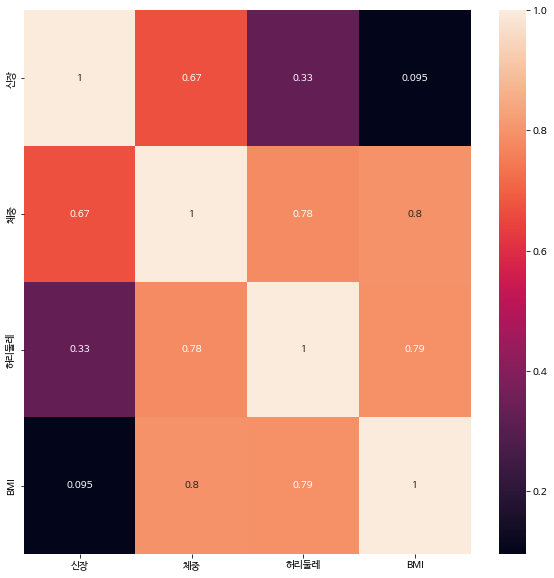

In [20]:
corrmat= df_1.corr()
plt.figure(figsize=(10, 10))  
sns.heatmap(corrmat,annot=True)

##### Strong or high 상관관계 (r >= 0.7)
- 체중-허리둘레
- BMI - 허리둘레
- 체중 - BMI

##### Fair or moderate ( 0.4 <= r < 0.7)
- 체중-신장

##### Poor or week (0 <= r < 0.4)
- 허리둘레-신장
- 신장-BMI

**인사이트**
1.   신장과 비만율은 상관관계가 없다.
2.   신장과 체중은 다소 상관관계가 있다.
(= 키가 큰 사람은 체중이 많이 나가는 경향이 있다.)
3. 허리둘레와 체중은 높은 상관관계가 있고 비만율과도 높은 상관관계가 있다.


## 그래프 2️⃣ : 기초적인 정보를 파이차트로 시각화하여 각 비율을 알아보자
- (성비, 비만여부, 흡연상태, 음주여부)

In [36]:
pie_labels_0 = df_1['성별코드'].value_counts().index.tolist()
pie_values_0 = df_1['성별코드'].value_counts().values.tolist()

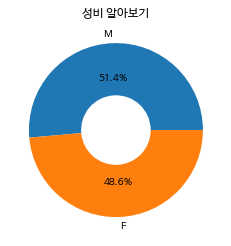

<Figure size 1440x1440 with 0 Axes>

In [37]:
plt.pie(pie_values_0, labels=pie_labels_0, autopct = '%.01f%%',wedgeprops = {'width':0.6})
plt.title('성비 알아보기')
plt.figure(figsize=(20, 20)) 
plt.show()

In [32]:
pie_labels_1 = df_1['grades'].value_counts().index.tolist()
pie_values_1 = df_1['grades'].value_counts().values.tolist()

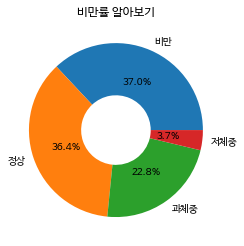

<Figure size 1440x1440 with 0 Axes>

In [33]:
plt.pie(pie_values_1, labels=pie_labels_1, autopct = '%.01f%%',wedgeprops = {'width':0.6})
plt.title('비만률 알아보기')
plt.figure(figsize=(20, 20)) 
plt.show()


In [30]:
pie_labels_2 = df_1['흡연상태'].value_counts().index.tolist()
pie_values_2 = df_1['흡연상태'].value_counts().values.tolist()

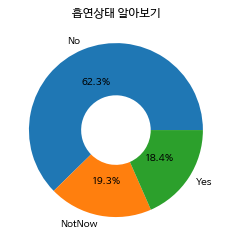

<Figure size 1440x1440 with 0 Axes>

In [31]:
plt.pie(pie_values_2, labels=pie_labels_2, autopct = '%.01f%%',wedgeprops = {'width':0.6})
plt.title('흡연상태 알아보기')
plt.figure(figsize=(20, 20)) 
plt.show()


In [34]:
pie_labels_3 = df_1['음주여부'].value_counts().index.tolist()
pie_values_3 = df_1['음주여부'].value_counts().values.tolist()

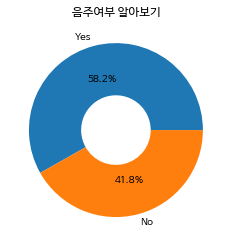

<Figure size 1440x1440 with 0 Axes>

In [35]:
plt.pie(pie_values_3, labels=pie_labels_3, autopct = '%.01f%%',wedgeprops = {'width':0.6})
plt.title('음주여부 알아보기')
plt.figure(figsize=(20, 20)) 
plt.show()


**인사이트**
-   성비는 남자 51%, 여자 49% 가량으로 거의 반반이다.
- 과체중 이상인 사람은 약 60%로 절반 이상을 차지한다.
- 금연에 성공한 사람을 포함하여 약 81%가 현재 담배를 피고있지 않다. 
- 음주를 하지 않는 사람보다 음주를 하는 사람의 비율이 약 16% 높다.



## 그래프 3️⃣ : 음주 여부와 흡연 상태가 체중에 미치는 영향을 막대차트로 알아보자

In [43]:
grades_sum_by_drinkYes = df_1[df_1['음주여부'] == 'Yes'].groupby('grades').BMI.count()
grades_sum_by_drinkNo = df_1[df_1['음주여부'] == 'No'].groupby('grades').BMI.count()

print(grades_sum_by_drinkYes)
print(grades_sum_by_drinkNo)

grades
과체중    1333
비만     2305
저체중     194
정상     1985
Name: BMI, dtype: int64
grades
과체중     951
비만     1392
저체중     179
정상     1658
Name: BMI, dtype: int64


In [53]:
#가나다 순으로 정렬된 grades의 순서를 저체중에서 비만까지 순서대로 재배열
grades_order = ['저체중','정상','과체중','비만']
grades_sum_by_drinkYes = grades_sum_by_drinkYes.loc[grades_order]
grades_sum_by_drinkNo = grades_sum_by_drinkNo.loc[grades_order]

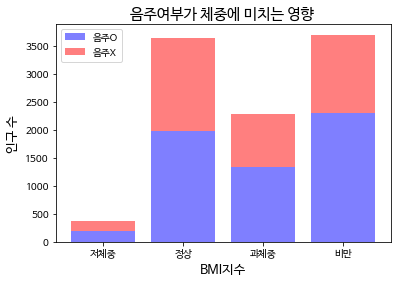

In [68]:
alpha = 0.5

p1 = plt.bar(grades_order, grades_sum_by_drinkYes, color='b', alpha=alpha)
p2 = plt.bar(grades_order, grades_sum_by_drinkNo, color='r', alpha=alpha,
             bottom=grades_sum_by_drinkYes) # stacked bar chart


plt.title('음주여부가 체중에 미치는 영향 ', fontsize=15)
plt.ylabel('인구 수', fontsize=13)
plt.xlabel('BMI지수', fontsize=13)
plt.legend((p1[0], p2[0]), ('음주O', '음주X'), fontsize=10)
plt.show()

In [63]:
grades_sum_by_smokeYes = df_1[df_1['흡연상태'] == 'Yes'].groupby('grades').BMI.count()
grades_sum_by_smokeNo = df_1[df_1['흡연상태'] == 'No'].groupby('grades').BMI.count()
grades_sum_by_smokeNotnow = df_1[df_1['흡연상태'] == 'NotNow'].groupby('grades').BMI.count()

print("흡연자")
print(grades_sum_by_smokeYes)
print("비흡연자")
print(grades_sum_by_smokeNo)
print("금연자")
print(grades_sum_by_smokeNotnow)

흡연자
grades
과체중    429
비만     767
저체중     68
정상     577
Name: BMI, dtype: int64
비흡연자
grades
과체중    1417
비만     2001
저체중     262
정상     2550
Name: BMI, dtype: int64
금연자
grades
과체중    438
비만     929
저체중     43
정상     516
Name: BMI, dtype: int64


In [64]:
#가나다 순으로 정렬된 grades의 순서를 저체중에서 비만까지 순서대로 재배열
grades_order = ['저체중','정상','과체중','비만']
grades_sum_by_smokeYes = grades_sum_by_smokeYes.loc[grades_order]
grades_sum_by_smokeNo = grades_sum_by_smokeNo.loc[grades_order]
grades_sum_by_smokeNotnow = grades_sum_by_smokeNotnow.loc[grades_order]

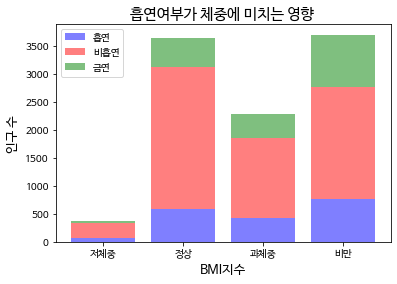

In [69]:
alpha = 0.5

p3 = plt.bar(grades_order, grades_sum_by_smokeYes, color='b', alpha=alpha)
p4 = plt.bar(grades_order, grades_sum_by_smokeNo, color='r', alpha=alpha,
             bottom=grades_sum_by_smokeYes) # stacked bar chart
p5 = plt.bar(grades_order, grades_sum_by_smokeNotnow, color='g', alpha=alpha,
             bottom=grades_sum_by_smokeYes + grades_sum_by_smokeNo) # stacked bar chart


plt.title('흡연여부가 체중에 미치는 영향 ', fontsize=15)
plt.ylabel('인구 수', fontsize=13)
plt.xlabel('BMI지수', fontsize=13)
plt.legend((p3[0], p4[0], p5[0]), ('흡연', '비흡연','금연'), fontsize=10)
plt.show()

**인사이트**
-   음주를 하는 사람들은 비만일 확률이 가장 높았으며 음주를 하지 않는 사람들은 정상체중일 확률이 가장 높다.
- 마찬가지로 흡연자는 비만일 확률이 가장 높았으며 비흡연자는 정상체중일 확률이 가장 높았다.
- 특이하게도 금연을 한 사람들은 비만일 확률이 정상체중일 확률보다 두배 가량 높다.

